In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
init_age=30
final_age = 121
retirement_age_list = list(range(45,70,5))

returnedcapital=1.02 # this means 2% real return
yearly_income = 90 # in thousands
yearly_expense = 36 # in thousands
init_cumulative = 100 # in thousands
age = [i for i in  range(init_age,final_age)]
expenses = [yearly_expense] * (final_age-init_age-1)
expenses.insert(0,0)

def create_df(retirement_age):
    income = [yearly_income] * (retirement_age-init_age-1)
    zeroincome = [0] * (final_age-retirement_age)
    income.insert(0,0)
    income.extend(zeroincome)

    df = pd.DataFrame(columns=['age','income','expenses','cumulative'])
    df['age']=age
    df['expenses']=expenses
    df['income']=income
    cum_calc = []
    for i in range(len(df)):
        if i == 0:
            cum_calc.append(init_cumulative)
        else:
            cum_calc.append((cum_calc[i-1]*returnedcapital) + df.loc[i,'income'] - df.loc[i, 'expenses'])

    df['cumulative'] = cum_calc
    return df

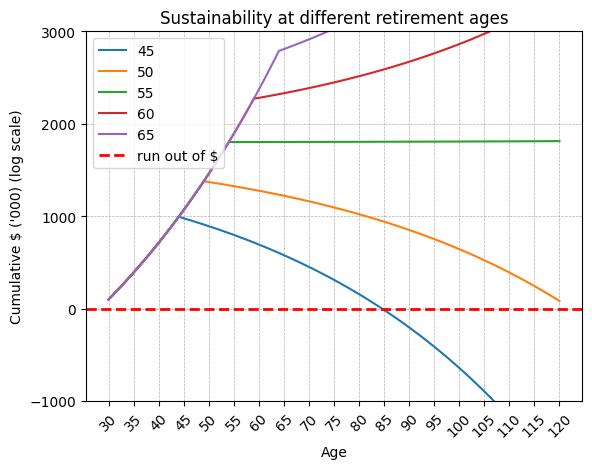

In [4]:
#fig, ax = plt.subplots(figsize=(10, 6))  # Increase width and height
#plt.yscale('log') # toggle if needed, but messes up other things

for retirement_age in retirement_age_list:
    df = create_df(retirement_age)
    plt.plot(df['age'],df['cumulative'],label=retirement_age)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='run out of $')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Cumulative $ (\'000) (log scale)')
plt.title('Sustainability at different retirement ages')
plt.legend()
plt.ylim(bottom=-1000,top=3000) # hides anything below y=0
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.savefig('Retirement funds.png', dpi=300)
plt.show()